# Optimizing Electric Vehicle Using Reinforcement Learning

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\arvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Reading dataset

In [2]:
df1 = pd.read_csv(r"C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Dataset\Residental Charging Schedule Dataset\Dataset 1_EV charging reports.csv", sep=';')
df2 = pd.read_csv(r"C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Dataset\Residental Charging Schedule Dataset\Dataset 2_Hourly EV loads - Per user.csv", sep=';')
df3a = pd.read_csv(r"C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Dataset\Residental Charging Schedule Dataset\Dataset 3a_Hourly EV loads - Aggregated private.csv", sep=';')
df3b = pd.read_csv(r"C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Dataset\Residental Charging Schedule Dataset\Dataset 3b_Hourly EV loads - Aggregated shared.csv", sep=';')
df5 = pd.read_csv(r"C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Dataset\Residental Charging Schedule Dataset\Dataset 5_AMS data from garage Bl2.csv", sep=';')
df6 = pd.read_csv(r"C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Dataset\Residental Charging Schedule Dataset\Dataset 6_Local traffic distribution.csv", sep=';')
df_weather = pd.read_csv(r"C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Dataset\Residental Charging Schedule Dataset\Norway_Trondheim_ExactLoc_Weather.csv")


In [3]:
df1.head()


,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:20,10,21.12.2018 10:23,10.0,"0,3","0,05",Dec,Friday,late morning (9-12),Less than 3 hours
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:24,10,21.12.2018 10:32,10.0,"0,87","0,136666667",Dec,Friday,late morning (9-12),Less than 3 hours
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:33,11,21.12.2018 19:46,19.0,"29,87","8,216388889",Dec,Friday,late morning (9-12),Between 6 and 9 hours
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:15,16,23.12.2018 16:40,16.0,"15,56","24,41972222",Dec,Saturday,late afternoon (15-18),More than 18 hours
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:03,22,24.12.2018 23:02,23.0,"3,62","0,970555556",Dec,Monday,late evening (21-midnight),Less than 3 hours


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_ID         6878 non-null   int64  
 1   Garage_ID          6878 non-null   object 
 2   User_ID            6878 non-null   object 
 3   User_type          6878 non-null   object 
 4   Shared_ID          1412 non-null   object 
 5   Start_plugin       6878 non-null   object 
 6   Start_plugin_hour  6878 non-null   int64  
 7   End_plugout        6844 non-null   object 
 8   End_plugout_hour   6844 non-null   float64
 9   El_kWh             6878 non-null   object 
 10  Duration_hours     6844 non-null   object 
 11  month_plugin       6878 non-null   object 
 12  weekdays_plugin    6878 non-null   object 
 13  Plugin_category    6878 non-null   object 
 14  Duration_category  6844 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 806.1+ KB


In [5]:
df1.nunique()

session_ID           6878
Garage_ID              24
User_ID                97
User_type               2
Shared_ID              12
Start_plugin         6740
Start_plugin_hour      24
End_plugout          6691
End_plugout_hour       24
El_kWh               2763
Duration_hours       6501
month_plugin           12
weekdays_plugin         7
Plugin_category         8
Duration_category       7
dtype: int64

In [6]:
df1.describe()

,session_ID,Start_plugin_hour,End_plugout_hour
count,6878.000000,6878.000000,6844.000000
mean,3439.500000,16.325240,12.546902
std,1985.651908,4.363108,5.256756
min,1.000000,0.000000,0.000000
25%,1720.250000,15.000000,7.000000
50%,3439.500000,17.000000,12.000000
75%,5158.750000,19.000000,17.000000
max,6878.000000,23.000000,23.000000


In [7]:
df1.columns

Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category'],
      dtype='object')

## Data Pre-Processing

In [8]:
df1.dropna(inplace=True)

In [9]:
df1['El_kWh'] = df1['El_kWh'].str.replace(',', '').astype(float)
df1['Duration_hours'] = df1['Duration_hours'].str.replace(',', '').astype(float)

In [10]:
df1 = pd.get_dummies(df1, columns=['User_type','Garage_ID', 'User_ID', 'Shared_ID', 'month_plugin', 'weekdays_plugin', 'Plugin_category', 'Duration_category'])

### Handling Outliers

In [11]:
# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05)  # Adjust the contamination parameter
df1['outlier'] = outlier_detector.fit_predict(df1[['El_kWh', 'Duration_hours']])

# Remove outliers
df1 = df1[df1['outlier'] != -1]

### Feature scaling

In [12]:
# Feature Scaling
scaler = StandardScaler()
df1[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df1[['El_kWh', 'Duration_hours']])


In [13]:
df1['Start_plugin']

25      09.01.2019 22:35
27      10.01.2019 16:30
29      11.01.2019 15:12
30      11.01.2019 17:13
31      11.01.2019 18:54
              ...       
6862    31.01.2020 13:57
6864    31.01.2020 14:58
6865    31.01.2020 15:00
6867    31.01.2020 15:26
6877    31.01.2020 20:42
Name: Start_plugin, Length: 1331, dtype: object

In [14]:
df1['Start_plugin'] = pd.to_datetime(df1['Start_plugin'], format='%d.%m.%Y %H:%M')

df1['Start_plugin'] = df1['Start_plugin'].dt.strftime('%d.%m.%Y %H:00')

In [15]:
df1.shape

(1331, 114)

In [16]:
df1['Start_plugin']

25      09.01.2019 22:00
27      10.01.2019 16:00
29      11.01.2019 15:00
30      11.01.2019 17:00
31      11.01.2019 18:00
              ...       
6862    31.01.2020 13:00
6864    31.01.2020 14:00
6865    31.01.2020 15:00
6867    31.01.2020 15:00
6877    31.01.2020 20:00
Name: Start_plugin, Length: 1331, dtype: object

In [17]:
df6['Date_from']

0        01.12.2018 00:00
1        01.12.2018 01:00
2        01.12.2018 02:00
3        01.12.2018 03:00
4        01.12.2018 04:00
               ...       
10243    31.01.2020 19:00
10244    31.01.2020 20:00
10245    31.01.2020 21:00
10246    31.01.2020 22:00
10247    31.01.2020 23:00
Name: Date_from, Length: 10248, dtype: object

In [18]:
merged_data = df1.merge(
    df6,
    left_on='Start_plugin',
    right_on='Date_from',
)

In [19]:
merged_data.drop([], axis=1, inplace=True)

In [20]:
merged_data.shape

(1331, 121)

In [21]:
merged_data.head()

,session_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,User_type_Shared,Garage_ID_AdA1,Garage_ID_AdO3,...,Duration_category_Less than 3 hours,Duration_category_More than 18 hours,outlier,Date_from,Date_to,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen
0,26,09.01.2019 22:00,22,09.01.2019 23:10,23.0,-1.052515,-1.293133,True,False,False,...,True,False,1,09.01.2019 22:00,09.01.2019 23:00,892,405,183,43,226
1,28,10.01.2019 16:00,16,10.01.2019 17:20,17.0,-1.157295,-0.864513,True,False,False,...,True,False,1,10.01.2019 16:00,10.01.2019 17:00,4212,2233,660,263,916
2,30,11.01.2019 15:00,15,11.01.2019 17:07,17.0,-1.105687,-0.305089,True,False,False,...,True,False,1,11.01.2019 15:00,11.01.2019 16:00,5180,2903,766,351,1121
3,31,11.01.2019 17:00,17,11.01.2019 21:43,21.0,-0.627922,1.025707,True,False,False,...,False,False,1,11.01.2019 17:00,11.01.2019 18:00,2612,1286,478,159,628
4,32,11.01.2019 18:00,18,12.01.2019 09:47,9.0,0.115702,-0.526140,True,False,False,...,False,False,1,11.01.2019 18:00,11.01.2019 19:00,2234,1034,436,116,505


In [22]:
df_weather.head()

,Unnamed: 0,clouds,datetime,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,0,66,2018-12-01,-1.7,5,40,6,34,288,48,...,2,127,966,144,52,7.4,1543618800,187,12.8,5.5
1,1,64,2018-12-02,-2.8,5,38,6,33,281,46,...,5,123,923,135,126,5.4,1543705200,177,10.8,3.6
2,2,100,2018-12-03,-0.7,5,37,5,33,273,44,...,1,119,881,128,21,2.4,1543791600,142,4.8,1.5
3,3,93,2018-12-04,-0.5,5,35,5,32,266,42,...,1,115,842,121,22,0.8,1543878000,234,12.8,3.9
4,4,87,2018-12-05,-1.9,5,34,5,32,260,41,...,2,111,804,114,39,-0.4,1543964400,206,13.6,3.7


In [23]:

merged_data['Start_plugin'] = pd.to_datetime(merged_data['Start_plugin'], format='%d.%m.%Y %H:%M')

merged_data['Start_plugin_date'] = merged_data['Start_plugin'].dt.date

In [24]:
df_weather.datetime

0      2018-12-01
1      2018-12-02
2      2018-12-03
3      2018-12-04
4      2018-12-05
          ...    
422    2020-01-27
423    2020-01-28
424    2020-01-29
425    2020-01-30
426    2020-01-31
Name: datetime, Length: 427, dtype: object

In [25]:
merged_data.Start_plugin_date

0       2019-01-09
1       2019-01-10
2       2019-01-11
3       2019-01-11
4       2019-01-11
           ...    
1326    2020-01-31
1327    2020-01-31
1328    2020-01-31
1329    2020-01-31
1330    2020-01-31
Name: Start_plugin_date, Length: 1331, dtype: object

In [26]:
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
merged_data['Start_plugin_date'] = pd.to_datetime(merged_data['Start_plugin_date'])

In [27]:
# Merge the data based on the hour values
df = merged_data.merge(
    df_weather,
    left_on='Start_plugin_date',
    right_on='datetime'
)

# Drop unnecessary date and hour columns
df.drop(['Date_from','Date_to','Unnamed: 0','datetime'], axis=1, inplace=True)

In [28]:
df

,session_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,User_type_Shared,Garage_ID_AdA1,Garage_ID_AdO3,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,26,2019-01-09 22:00:00,22,09.01.2019 23:10,23.0,-1.052515,-1.293133,True,False,False,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
1,28,2019-01-10 16:00:00,16,10.01.2019 17:20,17.0,-1.157295,-0.864513,True,False,False,...,1,119,915,137,18,4.4,1547074800,218,26.8,5.7
2,30,2019-01-11 15:00:00,15,11.01.2019 17:07,17.0,-1.105687,-0.305089,True,False,False,...,2,124,954,145,38,1.4,1547161200,260,23.6,7.0
3,31,2019-01-11 17:00:00,17,11.01.2019 21:43,21.0,-0.627922,1.025707,True,False,False,...,2,124,954,145,38,1.4,1547161200,260,23.6,7.0
4,32,2019-01-11 18:00:00,18,12.01.2019 09:47,9.0,0.115702,-0.526140,True,False,False,...,2,124,954,145,38,1.4,1547161200,260,23.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,6863,2020-01-31 13:00:00,13,31.01.2020 14:49,14.0,-0.957118,-0.845050,True,False,False,...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
1327,6865,2020-01-31 14:00:00,14,31.01.2020 18:46,18.0,-0.369882,-1.293113,True,False,False,...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
1328,6866,2020-01-31 15:00:00,15,31.01.2020 16:44,16.0,-0.979012,-0.405125,True,False,False,...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
1329,6868,2020-01-31 15:00:00,15,31.01.2020 18:28,18.0,-0.357371,0.269647,True,False,False,...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1


In [29]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['End_plugout', 'KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK', 'revision_status']

In [30]:
df.to_csv(r"C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Dataset\df1_traffic_weather.csv", index=False)


In [31]:
df.shape

(1331, 154)

In [32]:
df.columns

Index(['session_ID', 'Start_plugin', 'Start_plugin_hour', 'End_plugout',
       'End_plugout_hour', 'El_kWh', 'Duration_hours', 'User_type_Shared',
       'Garage_ID_AdA1', 'Garage_ID_AdO3',
       ...
       'solar_rad', 't_dhi', 't_dni', 't_ghi', 't_solar_rad', 'temp', 'ts',
       'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object', length=154)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Columns: 154 entries, session_ID to wind_spd
dtypes: bool(106), datetime64[ns](2), float64(16), int32(1), int64(24), object(5)
memory usage: 631.8+ KB


In [34]:
# List of columns to drop
columns_to_drop = ['snow_depth', 'revision_status', 'End_plugout', 'Start_plugin_date']

# Drop columns if they exist in the DataFrame
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

# Check data types and convert to strings if necessary, then to float
df['El_kWh'] = df['El_kWh'].astype(str).str.replace(',', '').astype(float)
df['Duration_hours'] = df['Duration_hours'].astype(str).str.replace(',', '').astype(float)

# List of categorical columns to one-hot encode
categorical_columns = ['User_type', 'KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK', 'Garage_ID', 'User_ID', 'Shared_ID', 'month_plugin', 'weekdays_plugin', 'Plugin_category', 'Duration_category']

# One-hot encode categorical features if they exist in the DataFrame
df = pd.get_dummies(df, columns=[col for col in categorical_columns if col in df.columns])

# Check the result
print(df.head())


   session_ID        Start_plugin  Start_plugin_hour  End_plugout_hour  \
0          26 2019-01-09 22:00:00                 22              23.0   
1          28 2019-01-10 16:00:00                 16              17.0   
2          30 2019-01-11 15:00:00                 15              17.0   
3          31 2019-01-11 17:00:00                 17              21.0   
4          32 2019-01-11 18:00:00                 18               9.0   

     El_kWh  Duration_hours  User_type_Shared  Garage_ID_AdA1  Garage_ID_AdO3  \
0 -1.052515       -1.293133              True           False           False   
1 -1.157295       -0.864513              True           False           False   
2 -1.105687       -0.305089              True           False           False   
3 -0.627922        1.025707              True           False           False   
4  0.115702       -0.526140              True           False           False   

   Garage_ID_AsO2  ...  SELSBAKK_872  SELSBAKK_874  SELSBAKK_89  SEL

In [35]:
df.shape

(1331, 2575)

In [36]:
df.dropna(inplace=True)

In [37]:
scaler = StandardScaler()
df[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df[['El_kWh', 'Duration_hours']])

### Data Splitting

In [38]:
X = df.drop(columns=['Duration_hours','session_ID','Start_plugin', 'Start_plugin_hour', 'End_plugout_hour'])  # All columns except Duration_hours
y = df['Duration_hours']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [39]:
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'ANN': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
}

### Dyna-Q parameters

In [40]:

gamma = 0.95  # Discount factor
alpha = 0.1   # Learning rate
epsilon = 0.1  # Exploration rate
n_planning_steps = 10  # Number of planning steps


### Initialize Q-values

In [41]:

Q_values = {model_name: 0 for model_name in models.keys()}


### SMAPE Calculation

In [42]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


### Q-Value Calculation

In [43]:
def choose_model(Q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(list(Q_values.keys()))
    else:
        return max(Q_values, key=Q_values.get)


### Metrics dictionary

In [44]:

metrics = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'MAPE': [],
    'SMAPE': []
}

### Dyna-Q Algorithm

In [45]:

for episode in range(100):  # Number of episodes
    model_name = choose_model(Q_values, epsilon)
    model = models[model_name]

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    smape_value = smape(y_test, y_pred)

    # Reward (negative MSE)
    reward = -mse

    # Update Q-values
    Q_values[model_name] = Q_values[model_name] + alpha * (reward + gamma * max(Q_values.values()) - Q_values[model_name])

    # Planning (simulate experiences)
    for _ in range(n_planning_steps):
        simulated_model_name = np.random.choice(list(Q_values.keys()))
        simulated_model = models[simulated_model_name]

        simulated_model.fit(X_train, y_train)
        simulated_y_pred = simulated_model.predict(X_test)

        simulated_mse = mean_squared_error(y_test, simulated_y_pred)
        simulated_reward = -simulated_mse

        Q_values[simulated_model_name] = Q_values[simulated_model_name] + alpha * (simulated_reward + gamma * max(Q_values.values()) - Q_values[simulated_model_name])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5262
[LightGBM] [Info] Number of data points in the train set: 1064, number of used features: 101
[LightGBM] [Info] Start training from score -0.002476
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5262
[LightGBM] [Info] Number of data points in the train set: 1064, number of used features: 101
[LightGBM] [Info] Start training from score -0.002476
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

### Model Selection based on Reinforcement Learning

In [46]:
# Determine the best model
best_model_name = max(Q_values, key=Q_values.get)
best_model = models[best_model_name]

### Training Selected Model

In [47]:
# Final training and prediction
best_model.fit(X_train, y_train)
final_y_pred = best_model.predict(X_test)

In [48]:
final_mse = mean_squared_error(y_test, final_y_pred)
final_mae = mean_absolute_error(y_test, final_y_pred)
final_mape = mean_absolute_percentage_error(y_test, final_y_pred) * 100
final_smape = smape(y_test, final_y_pred)

In [49]:
# Append the final metrics to the metrics dictionary
metrics['Model'].append(best_model_name)
metrics['MSE'].append(final_mse)
metrics['MAE'].append(final_mae)
metrics['MAPE'].append(final_mape)
metrics['SMAPE'].append(final_smape)

In [50]:
# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


               Model       MSE       MAE        MAPE      SMAPE
0  Gradient Boosting  0.347677  0.376183  232.883229  61.578537


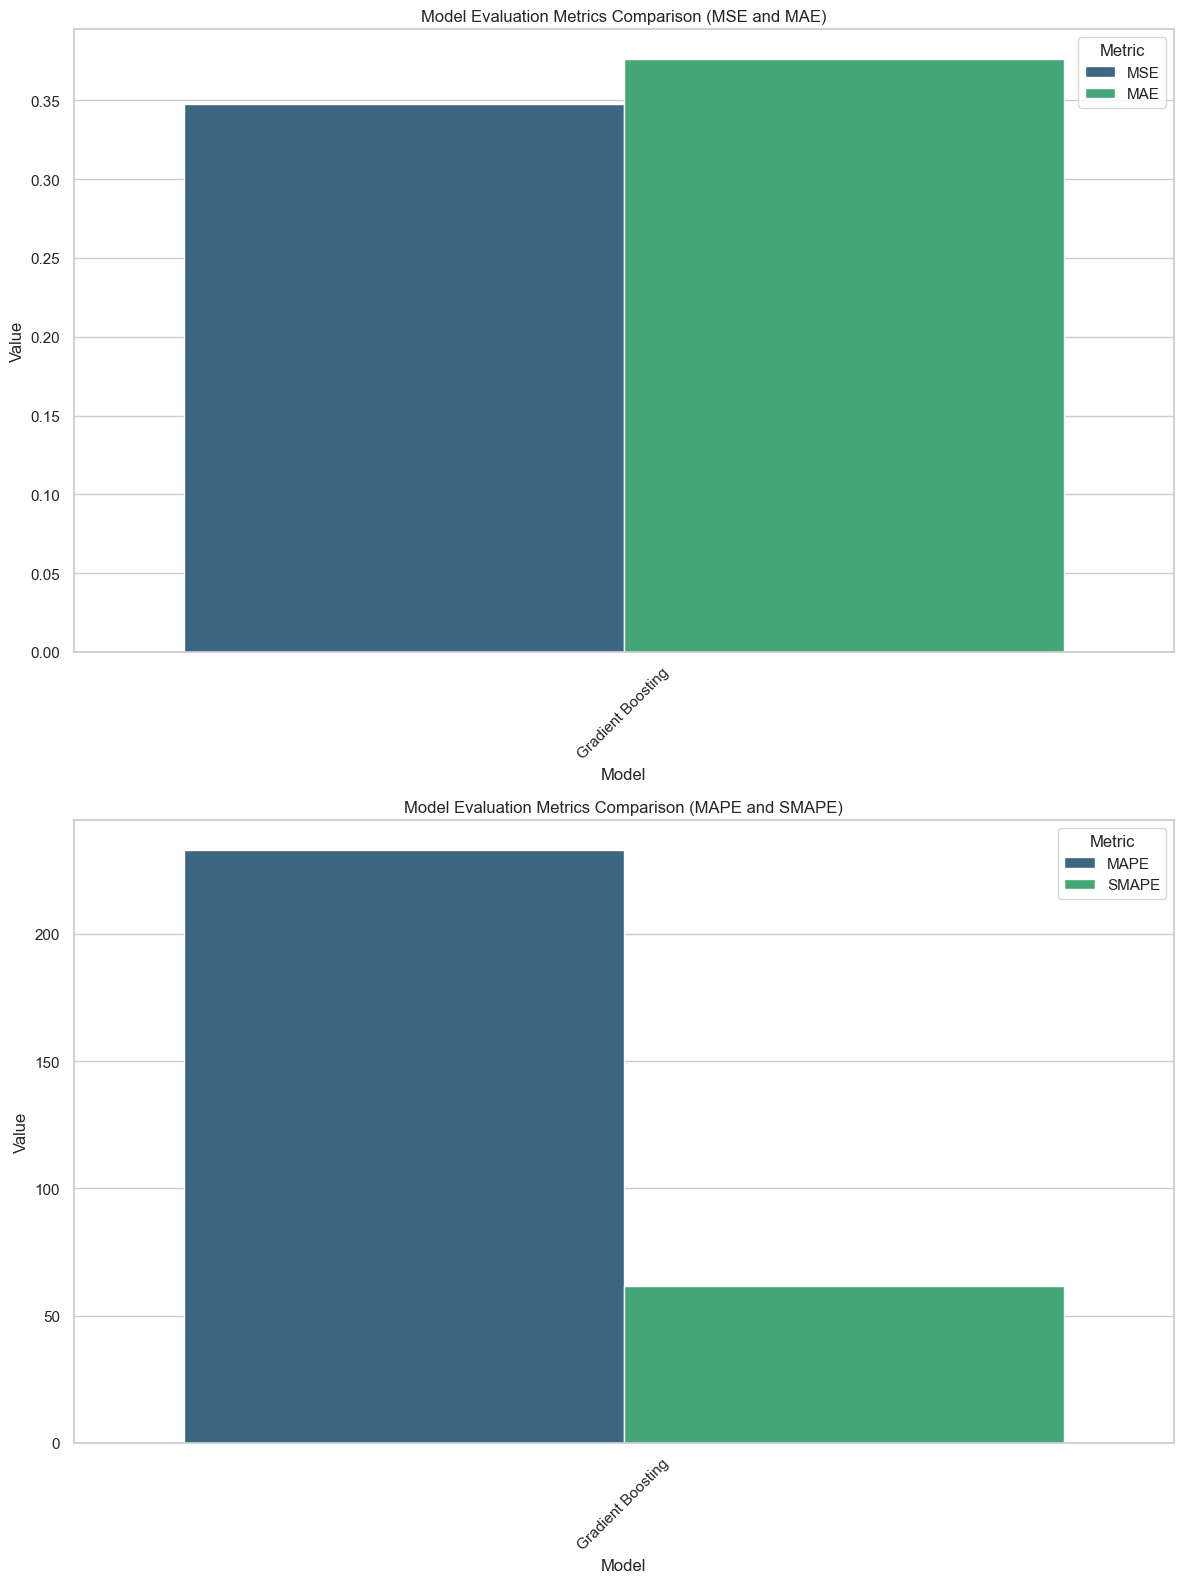

In [51]:

# Set the style of the visualization
sns.set(style="whitegrid")

# Melt the dataframe to long format for seaborn plotting
metrics_melted = pd.melt(metrics_df, id_vars=['Model'], value_vars=['MSE', 'MAE', 'MAPE', 'SMAPE'],
                         var_name='Metric', value_name='Value')

# Define the size of the plot
plt.figure(figsize=(12, 16))

# Plot for MSE and MAE
plt.subplot(2, 1, 1)
mse_mae_data = metrics_melted[metrics_melted['Metric'].isin(['MSE', 'MAE'])]
sns.barplot(x='Model', y='Value', hue='Metric', data=mse_mae_data, palette="viridis")
plt.title('Model Evaluation Metrics Comparison (MSE and MAE)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')

# Plot for MAPE and SMAPE
plt.subplot(2, 1, 2)
mape_smape_data = metrics_melted[metrics_melted['Metric'].isin(['MAPE', 'SMAPE'])]
sns.barplot(x='Model', y='Value', hue='Metric', data=mape_smape_data, palette="viridis")
plt.title('Model Evaluation Metrics Comparison (MAPE and SMAPE)')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Residuals Plot

<Axes: title={'center': 'Residual Plot'}, xlabel='Predicted Value', ylabel='Residuals'>

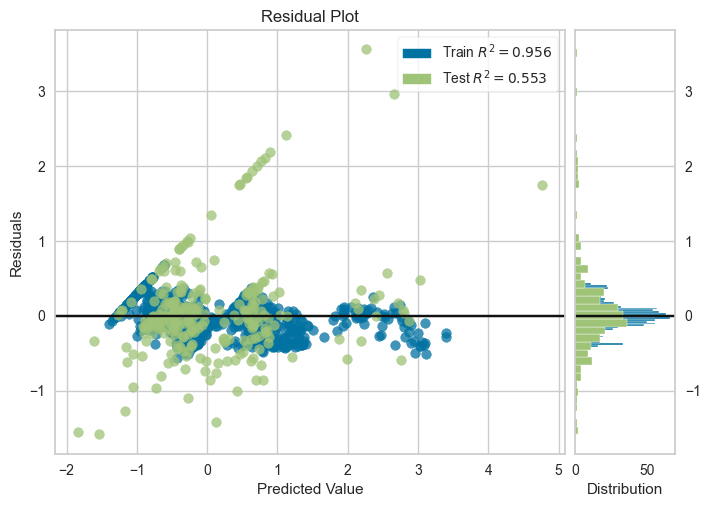

In [52]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model, title="Residual Plot")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath=r'C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Results\residual_plot.png')



### Prediction Error

<Axes: title={'center': 'Prediction Error Plot'}, xlabel='$y$', ylabel='$\\hat{y}$'>

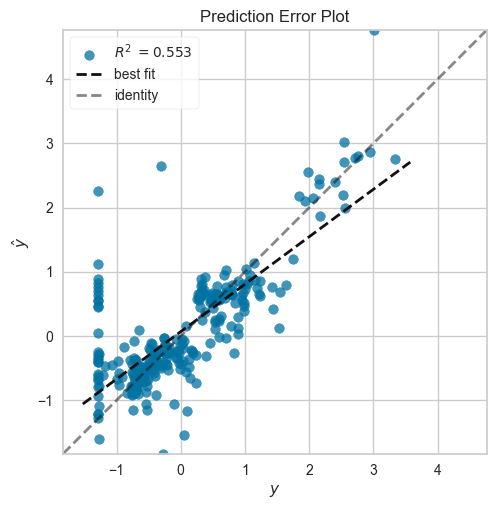

In [53]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model, title="Prediction Error Plot")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show(outpath=r'C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Results\prediction_error_plot.png')


### Learning Curve

<Axes: title={'center': 'Learning Curve'}, xlabel='Training Instances', ylabel='Score'>

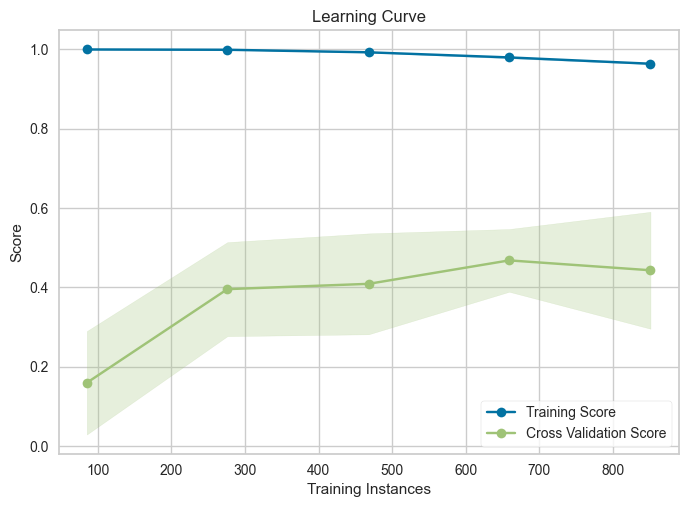

In [54]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(model,title="Learning Curve",cv=5)
visualizer.fit(X_train, y_train)
visualizer.show(outpath=r'C:\Users\arvin\OneDrive\Projects\Optimizing Electric Vehicle Charging Using Reinforcement Learning\Results\learning_curve.png')
